**Connected-component**

Connected-component labeling (CCL), connected-component analysis (CCA), blob extraction, region labeling, blob discovery, or region extraction is an algorithmic application of graph theory, where subsets of connected components are uniquely labeled based on a given heuristic.

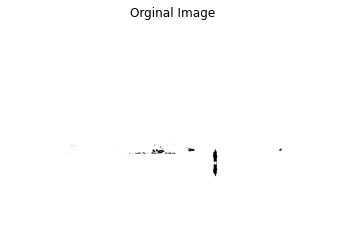

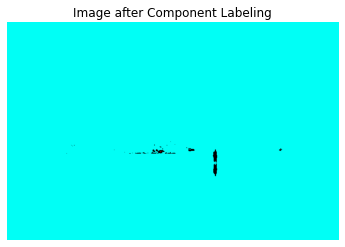

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def connected_component_label(path):
    
    # Getting the input image
    img = cv2.imread(path, 0)
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
    # Applying cv2.connectedComponents() 
    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()
img1 = cv2.imread('/content/image10.png')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
connected_component_label('/content/image10.png')

A faster-scanning algorithm for connected-region extraction is presented below.

On the first pass:

Iterate through each element of the data by column, then by row (Raster Scanning)
1. If the element is not the background
2. Get the neighboring elements of the current element
3. If there are no neighbors, uniquely label the current element and continue

Otherwise, find the neighbor with the smallest label and assign it to the current element.

Store the equivalence between neighboring labels
On the second pass:

1. Iterate through each element of the data by column, then by row
2. If the element is not the background
3. Relabel the element with the lowest equivalent label

Here, the background is a classification, specific to the data, used to distinguish salient elements from the foreground. If the background variable is omitted, then the two-pass algorithm will treat the background as another region.